# SVM Lineal ...

$$\frac{1}{n}\sum_{i = 1}^n \max(0, 1 - y_i(Ax_i - b)) + \alpha ||A||^2$$

 - $A$: es el vector de las pendientes en cada variable
 - $b$: es la ordenada en el origen (intercept)
 - $ x = (x_1, x_2, \cdots, x_n)$: es el vector de datos
 - $y_i$: es la clase del objeto (-1 o 1)
 - $\alpha$: es el coeficiente de regularización y suavizado de la separación

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
iris = datasets.load_iris()
session = tf.Session()

In [3]:
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [4]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace = False)
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))
x_vals_train = x_vals[train_idx]
y_vals_train = y_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_test = y_vals[test_idx]

In [5]:
batch_size = 30

x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [2, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [6]:
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [7]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [8]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [9]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
init = tf.global_variables_initializer()
session.run(init)

In [11]:
loss_vect = []
train_acc = []
test_acc = []
for i in range(6000):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if (i + 1) % 50 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss))

Paso # 50, A = [[-0.13751012]
 [ 0.4750561 ]], b = [[0.95608896]], Loss = [0.7473233]
Paso # 100, A = [[-0.0957108 ]
 [ 0.34665513]], b = [[0.9319225]], Loss = [1.0592419]
Paso # 150, A = [[-0.07924533]
 [ 0.22474526]], b = [[0.9124224]], Loss = [0.47305435]
Paso # 200, A = [[-0.05468355]
 [ 0.11199607]], b = [[0.8914224]], Loss = [0.64585245]
Paso # 250, A = [[-0.02567429]
 [ 0.01936243]], b = [[0.8730893]], Loss = [0.67048454]
Paso # 300, A = [[-0.01358117]
 [-0.05591542]], b = [[0.8595895]], Loss = [0.58295]
Paso # 350, A = [[ 0.00226975]
 [-0.11557633]], b = [[0.8455895]], Loss = [0.6907874]
Paso # 400, A = [[ 0.00750496]
 [-0.17826286]], b = [[0.83208966]], Loss = [0.43810913]
Paso # 450, A = [[ 0.02168901]
 [-0.23395261]], b = [[0.81625646]], Loss = [0.60183686]
Paso # 500, A = [[ 0.04351657]
 [-0.2834162 ]], b = [[0.79975647]], Loss = [0.8646898]
Paso # 550, A = [[ 0.04528923]
 [-0.33728746]], b = [[0.7860898]], Loss = [0.62402683]
Paso # 600, A = [[ 0.05828718]
 [-0.3858869 ]],

Paso # 4850, A = [[ 0.06912694]
 [-1.2992642 ]], b = [[-0.39974287]], Loss = [0.35192567]
Paso # 4900, A = [[ 0.08800073]
 [-1.2999201 ]], b = [[-0.4159095]], Loss = [0.41573438]
Paso # 4950, A = [[ 0.08161583]
 [-1.2998562 ]], b = [[-0.42774275]], Loss = [0.3766877]
Paso # 5000, A = [[ 0.0783844]
 [-1.2993586]], b = [[-0.4402428]], Loss = [0.43686843]
Paso # 5050, A = [[ 0.08568767]
 [-1.3037055 ]], b = [[-0.45590946]], Loss = [0.36612928]
Paso # 5100, A = [[ 0.08422168]
 [-1.3075193 ]], b = [[-0.4685761]], Loss = [0.39901546]
Paso # 5150, A = [[ 0.08024433]
 [-1.3068979 ]], b = [[-0.4810761]], Loss = [0.37558573]
Paso # 5200, A = [[ 0.08684915]
 [-1.3085506 ]], b = [[-0.49607605]], Loss = [0.41056275]
Paso # 5250, A = [[ 0.08280878]
 [-1.3152488 ]], b = [[-0.5089094]], Loss = [0.41950262]
Paso # 5300, A = [[ 0.07844823]
 [-1.3165379 ]], b = [[-0.5207431]], Loss = [0.39952707]
Paso # 5350, A = [[ 0.06573182]
 [-1.3176364 ]], b = [[-0.5315762]], Loss = [0.4235083]
Paso # 5400, A = [[ 0

In [12]:
[[a1], [a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2 / a1
y_intercept = b / a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope * i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

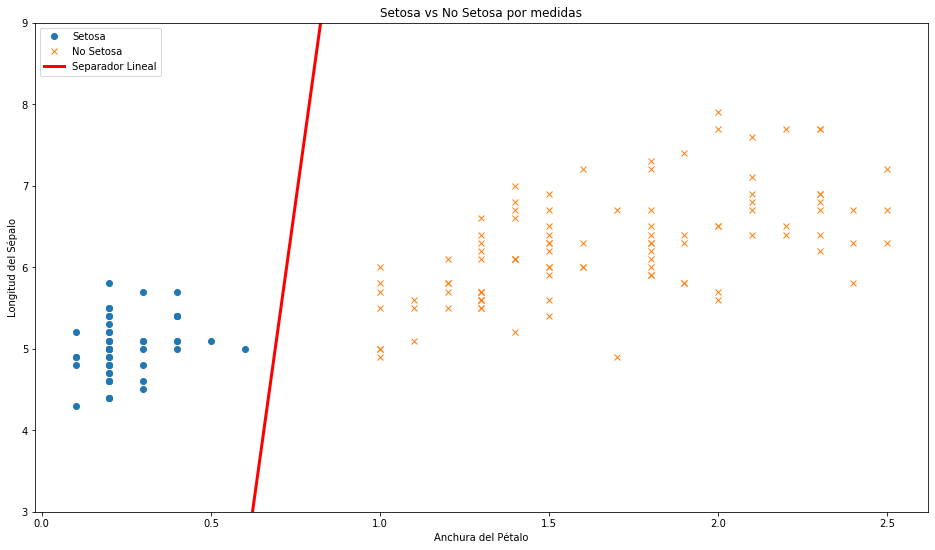

In [13]:
plt.figure(figsize = (16, 9))
plt.plot(setosa_x, setosa_y, "o", label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, "x", label = "No Setosa")
plt.plot(x1_vals, best_fit, "r-", label = "Separador Lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.ylim([3, 9])
plt.show()

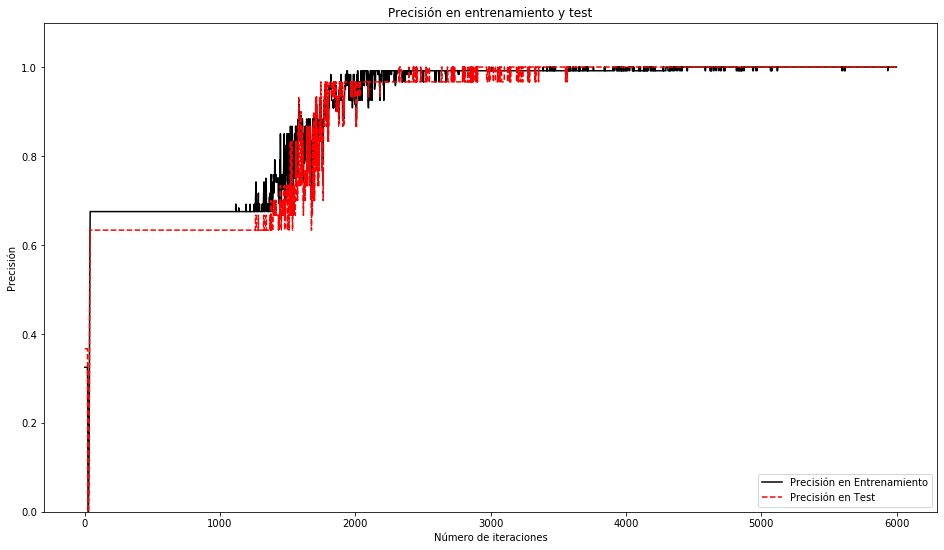

In [14]:
plt.figure(figsize = (16, 9))
plt.plot(train_acc, "k-", label = "Precisión en Entrenamiento")
plt.plot(test_acc, "r--", label = "Precisión en Test")
plt.xlabel("Número de iteraciones")
plt.title("Precisión en entrenamiento y test")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.ylim([0, 1.1])
plt.show()

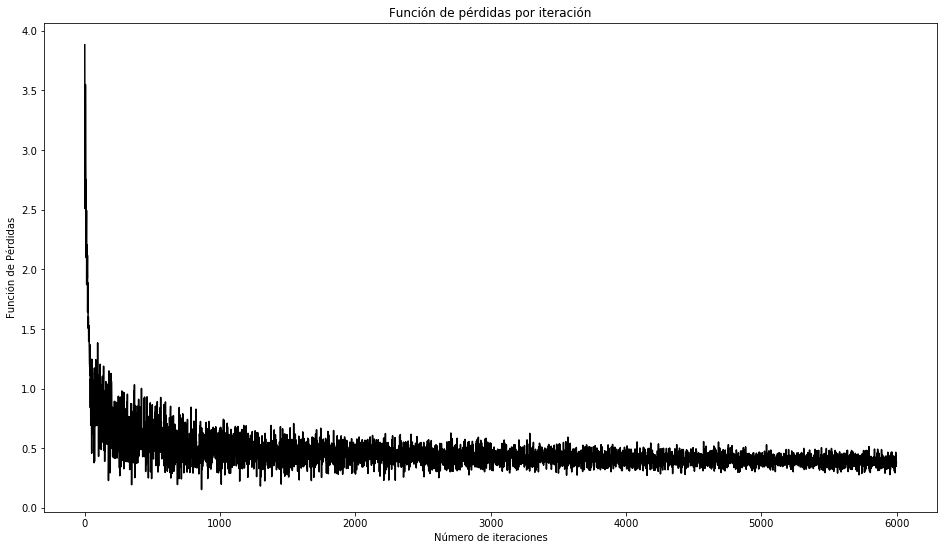

In [15]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-")
plt.title("Función de pérdidas por iteración")
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de Pérdidas")
plt.show()